# Objective

Assess our coverage across the relevant range.

Plot a histogram of NND for all spots, trying a few different NND bin widths, to help  select the bin width we'll use for our analysis and also see if we need to generate images to fill in any gaps.

# Takeaway

There do not seem to be significant gaps in our coverage across the relevant range.

Bin width = 2 or 3 seem like they might make sense for our analysis. Perhaps we can have a bin for all spots with NND above a certain value, e.g. a bin for NND >= 14.

In [46]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import KDTree
from scipy import stats
import matplotlib.pyplot as plt

In [1]:
density_list = [0.0025, 0.0027, 0.003, 0.0033, 0.0037, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]
cwd = os.getcwd()
nnd_list = []
for density in density_list:
    csv_path = cwd + '/spot_data/' + 'snr_9_1_density_' + str(density) + '_coord_snr_list.csv'
    ref_df = pd.read_csv(csv_path)
    ref_points = ref_df.loc[:, ['col', 'row']].as_matrix()
    ref_kdt = KDTree(ref_points, leaf_size=2, metric='euclidean')
    for point in ref_points:
        dist, ind = ref_kdt.query([point], k=2)
        nnd_list.append(dist[0][1])

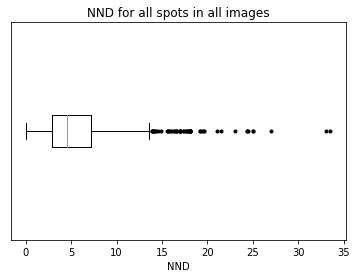

mean  = 5.69
stdev = 4.37


In [48]:
flierprops = dict(markerfacecolor='black', markersize=3)
plt.boxplot(nnd_list, vert=False, flierprops=flierprops)
plt.title('NND for all spots in all images')
plt.xlabel('NND')
plt.yticks([])
plt.show()
print('mean  = ' + str(round(np.mean(nnd_list), 2)))
print('stdev = ' + str(round(np.std(nnd_list), 2)))

In [ ]:
print('Summary statistics for all spots')
np.var(nnd_list)


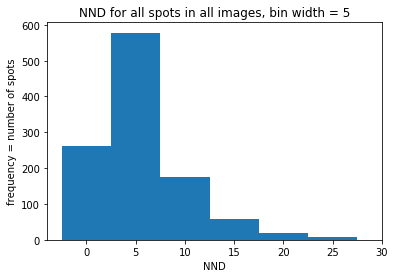

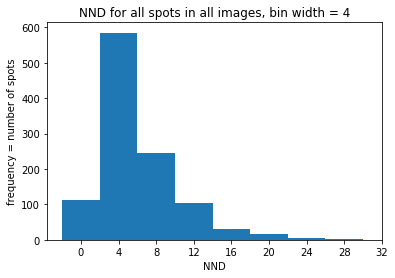

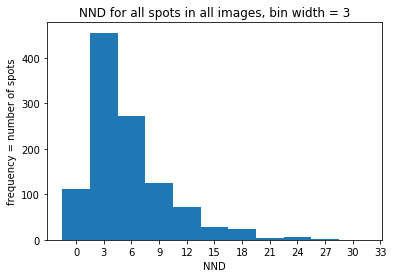

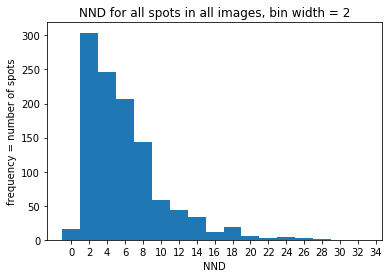

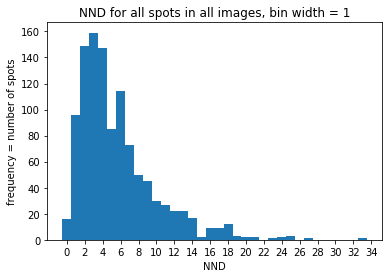

In [45]:
for bin_width in [5, 4, 3, 2, 1]:
    plt.hist(nnd_list, bins=np.arange(0, 35, bin_width)-bin_width/2)
    if bin_width == 1:
        plt.xticks(np.arange(0, 35, 2))
    else:
        plt.xticks(np.arange(0, 35, bin_width))
    plt.title('NND for all spots in all images, bin width = ' + str(bin_width))
    plt.xlabel('NND')
    plt.ylabel('frequency = number of spots')
    plt.show()